# FYS2009 - Aineopintojen laboratoriotyöt II
---
**26.3.2019**

---

---

# AOL II.2 "Hehkulamppu"
---
Laskarien deadline 7.4. & selkkarin deadline 14.4.

Huom! paljon uusia ja tuttuja yksikköjä ... keskitytään oleelliseen. Mietitään, mikä kaikki säilyy vakiona ja voidaan redusoida vain yhdeksi mittausta määrittäväksi vakiokertoimeksi.

## Mustan kappaleen säteily ja mittaaminen
## Numeerinen integorinti ja interpolointi

---

---

## Mustan kappaleen säteily

<img src="SpectralRadiance.png" width="800">

### Mustan kappaleen säteily - Stefan-Bolzmannin laki

$$j^* = \varepsilon \sigma T^4$$ missä:

- $j^*$ säteilyteho pinta-alayksikköä kohden
- $\varepsilon \leq 1$ emissiivisyys, mustalle kappaleelle $\varepsilon = 1$
- $\sigma$ Stefan–Boltzmannin vakio
    - $\sigma \approx 5,67 \cdot 10^{-8} \; \mathrm{W} / \mathrm{m^2 K^4} $
- $T$ kappaleen lämpötila
---
- Tehollinen tarkastelu: $P = A \varepsilon \sigma T^4$, missä $A$ on kappaleen pinta-ala

### Mustan kappaleen säteily - Planckin laki

$$B_{\nu}(\nu,T) =\dfrac{2h\nu^3}{c^2}\dfrac{1}{\exp\left(\frac{h\nu}{kT}\right)-1}$$ missä

- $B_{\nu}$ spektrinen radianssi
- $h$ Plankcin vakio
- $c$ valonnopeus
- $k$ Boltzmannin vakio
- $\nu$ säteilyn taajuus
- $T$ kappaleen lämpötila

---

- radianssi $L=\int B_\nu \mathrm{d}\nu$
- $[L]=\mathrm{W}/\mathrm{m^2}\mathrm{sr}$

#### Plackin laki aallonpituuden funktiona

Kokonaisenergia välillä $(\nu,\nu+\mathrm{d}\nu)$ tai vastaavalla välillä $(\lambda,\lambda+\mathrm{d}\lambda)$ on

$$ \begin{align} E(\nu,\nu+\mathrm{d}\nu) &= E(\lambda,\lambda+\mathrm{d}\lambda) \\ B_\nu(\nu,T) \; \mathrm{d}\nu &= -B_\lambda(\lambda,T)\;\mathrm{d}\lambda \end{align} $$


Muistetaan, että $\nu = \dfrac{c}{\lambda}$, joten $\mathrm{d}\nu = - c\dfrac{\mathrm{d}\lambda}{\lambda^2}$. Tällöin Planckin laki aallonpituuden funktiona on muotoa

$$B_{\lambda}(\lambda,T)=\dfrac{2hc^2}{\lambda^5}\dfrac{1}{\exp\left(\frac{hc}{\lambda kT}\right)-1}$$


### Valoanturi
- Valoanturi on säteilymittari, joka on tehty mittaamaan väkyvää valoa.
- Mittarin vaste- tai herkkyyskäyrä kertoo aallonpituuden funktiona, miten suuren osan säteilystä mittari mittaa.
- Oletetaan musta kappale jonka $T=3000 \; \mathrm{K}$ ja säteilymittari, jonka vastefunktio on normaalijakautunut parametreilla $\mu = 600 \; \mathrm{nm}$ ja $\sigma = 100 \; \mathrm{nm}$
    - (Vaste mielikuvituksellinen eikä vastaa laboratoriossa käytettävän mittarin vastetta!)
<img src="ResponseFunction.png" width="800">
- Huom. Kaikki tähän asti laskennallista eli voidaan laskea ennuste mitatulle spektrille ja täten mittalaitteen näyttämälle arvolle!

### Systeemi
- säteilevä musta kappale
- valoanturi ~ _mittayksikkönä_ lux
    - herkkyys aallonpituuden funktiona
- mittausgeometrian vakionti:
    - mustan kappaleen pinta-ala
    - valoanturin pinta-ala
    - valoanturin etäisyys
    - valoanturin asento suhteessa mustaan kappaleeseen
- jos geometria on vakioitu:
    - lämpötilasta riippumatta **vakio osuus** mustankappaleen säteilystä päätyy anturille
    - anturin herkkyydellä kerrottuna ja geometrisilla vakiolla korjattuna mustan kappaleen radianssi $L$ suoraan verrannollinen havaittavaan valaistusvoimakkuuteen $E_v$

### Mittaukset
- Ohmin laki $U = RI$
- Teho $P = UI$
- $L_\mathrm{teoreettinen} ~~ \mathrm{ vs.} ~~ L_\mathrm{kokeellinen}$

<img src="Piiri.png" width="600">

## Numeerinen integrointi

- Oletetaan, että käyrän alle jäävä pinta-ala on suunnilleen yhtä suuri kuin samaan kohtaan sovitetun muodon pinta-ala.
- Laskemalla riittävän usean muodon pinta-alan summa, voidaan numeerisesti integroida hankalia tai tuntemattomia yhtälöitä.
- Erilaisia menetelmiä muodon perusteella:
    - Riemannin summa
    - Simpsonin menetelmä
    - Puolisuunnikassääntö
    - yms.

### Puolisuunnikassääntö
$$ \int_a^b f(x)\mathrm{d}x \approx \sum_{k=1}^N \dfrac{f(x_{k-1})+f(x_k)}{2}\Delta x_k $$

In [2]:
from IPython.display import IFrame
puolisuunnikas = "https://www.geogebra.org/material/iframe/id/xd8t5gkz/width/800/height/500/border/888888/rc/false/ai/false/sdz/false/smb/false/stb/false/stbh/false/ld/false/sri/false"

In [3]:
IFrame(puolisuunnikas, width=800, height=500)

### Python-esimerkki numeerisesta integroinnista
Ilmakehästä mitattua aerosolihiukkaspopulaatiota hiukkasmuodostuksen aikana voi kuvata kaksihuippuisella lognormaalilla jakaumalla.

In [4]:
# -*- coding: utf-8 -*-

# ladataan pakolliset kirjastot
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# hiukkasen halkaisija logaritmisin stepein
dp=10.**(np.arange(np.log10(1e-9),np.log10(1e-6),0.001))

# jakauman tunnusarvot
s=np.log(3)
mu1=np.log(5e-7)
mu2=np.log(1e-9)

In [5]:
# Isommat hiukkaset
pd_big = lognorm.pdf(dp,s,loc=0, scale = np.exp(mu1))
pd_big = pd_big/max(pd_big)/500

# Pienemmät hiukkaset
pd_small = lognorm.pdf(dp,s,loc=0, scale = np.exp(mu2))
pd_small = pd_small/max(pd_small)

# Yhteensä pd as particle_distribution
pd=pd_big+pd_small

def plot1():
    plt.loglog(dp,pd)
    plt.xlabel("Halkaisija (m)", fontsize = 12)
    plt.ylabel("Pitoisuus (mielivaltainen yksikkö)", fontsize = 12)
    plt.show()

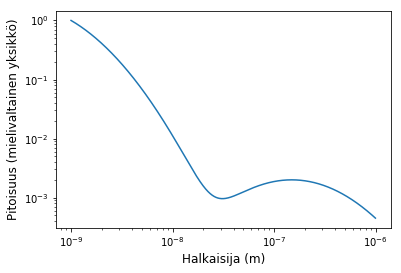

In [6]:
plot1()

#### Hiukkaslaskuri laskee hiukkasia kokoriippuvaisesti seuraavan parametrisaation mukaan

$$\eta_{\mathrm{act}}(D_p)=1-\exp\left(-\ln{2}\frac{D_p-D_{p,0}}{D_{p,50}-D_{p,0}}\right),$$

missä
- $\eta_{\mathrm{act}}(D_p)$ on hiukkasen halkaisijasta riippuva havaintotehokkuus (0-100%)
- $D_p$ on halkaisija
- $D_{p,0}$ on halkaisija jossa havaintotehokkuus on 0
- $D_{p,50}$ on halkaisija jossa havaintotehokkuus on 50%

In [7]:
# hiukkaslaskurin havaintotehokkuuskäyrä halkaisijan funktiona
# piste jossa havaintotehokkuus on 0
dp0=5.0e-9

# piste jossa havaintotehokkuus on 50%
dp50=7.0e-9;

#käyrän parametrisaatio
# de as detection_efficiency
de=1-np.exp(-np.log(2)*(dp-dp0)/(dp50-dp0))
# stolzenburg & mcmurry, 1991, aerosol science and technology

# aseta negatiiviset arvot nollaksi
de[de < 0] = 0

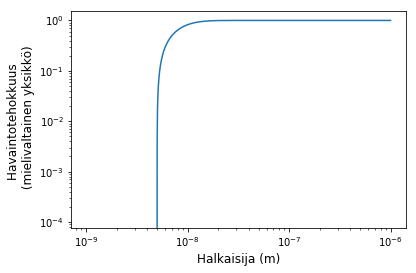

In [8]:
plt.loglog(dp,de)
plt.xlabel("Halkaisija (m)", fontsize = 12)
plt.ylabel("Havaintotehokkuus \n (mielivaltainen yksikkö)", fontsize = 12)
plt.show()

#### Kuinka suuren osan hiukkasista hiukkaslaskuri mittaa?

In [9]:
# mitatut hidut
# det as detected particles
det=pd*de

# hiukkasia yhteensä
c_tot=np.trapz(pd,dp)
c_det=np.trapz(det,dp)
detected_fraction=c_det/c_tot

print('Havaittujen osuus {} %'.format(round(detected_fraction,3)*100))

Havaittujen osuus 48.8 %


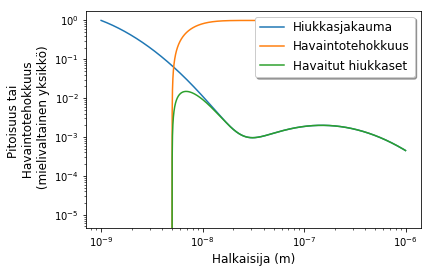

In [10]:
plt.loglog(dp,pd,label="Hiukkasjakauma")
plt.loglog(dp,de,label="Havaintotehokkuus")
plt.loglog(dp,det,label="Havaitut hiukkaset")
plt.xlabel("Halkaisija (m)", fontsize = 12)
plt.ylabel("Pitoisuus tai \n Havaintotehokkuus \n (mielivaltainen yksikkö)", fontsize = 12)
plt.legend(loc='upper right', shadow=True, fontsize = 12)
plt.show()

#### Kuinka suuri osa havaituista hiukkasista on kooltaan 50 – 100 nm?

In [11]:
# etsitään niiden indeksien väli, joilla halkaisija halutulla välillä
index50to100=np.where((dp<=100e-9) & (dp>=50e-9))

# integroinnin ala ja ylärajojen indexit ll=lower limit, ul upper limit
ll=index50to100[0][0]
ul=index50to100[0][-1]

#havaitut hidut välillä 50-100 nm
c_50to100=np.trapz(det[ll:ul],dp[ll:ul])
detected_fraction_50to100=c_50to100/c_det

print('Hiukkasia välillä 50-100 nm {:.1f} %'.format(round(detected_fraction_50to100,3)*100))

Hiukkasia välillä 50-100 nm 6.6 %


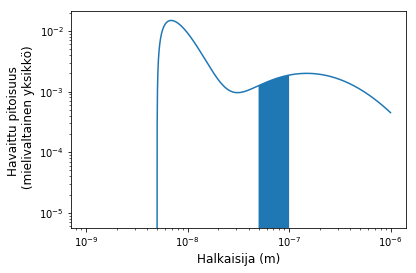

In [12]:
plt.loglog(dp,det)
plt.fill_between(dp, det, where=((dp>50e-9)&(dp<100e-9)))
plt.xlabel("Halkaisija (m)", fontsize = 12)
plt.ylabel("Havaittu pitoisuus \n (mielivaltainen yksikkö)", fontsize = 12)
plt.show()

##  Datan interpolaatio

- Joskus on ongelmana, että kahden eri datasetin x-akselit saavat eri arvoja, esim. mitatuissa aikasarjoissa on eri aikaresoluutio.
- Yksi tapa päästä ongelmasta eroon on interpoloida toinen datasetti ensimmäisen x-akselille.
- Tapoja on monia https://en.wikipedia.org/wiki/Interpolation
    - Lähimmän naapurin interpolaatio
    - Lineaarinen interpolaatio
    - Polynominen interpolaatio
    - Spline interpolaatio

###  Python-esimerkki datan interpolaatiosta

- Ongelmana on, että kokeellisella havaintotehokkuus-käyrällä on erilainen x-akseli kuin hiukkaskokojakaumalla.
- Pitäisi saada havaintotehokkuuskäyrään pisteitä muillakin x:n arvoilla, kuin mitä datassa on valmiina.

In [16]:
# Hiukkasten jakauma
dp_sd = 10.**(np.arange(np.log10(1e-9),np.log10(1e-6),0.001))

# luetaan erillisestä tekstitiedostosta havaintotehokkuuden sisältö sarakevektoreiksi
data = np.genfromtxt("luento2esimdata.txt", dtype=float, comments='#', delimiter=",")
dp = data[:,0]*1e-9 # halkaisija [nm]
det = data[:,1] # havaintotehokkuus [%]

def plot2():
    plt.plot(dp,det,'.')
    plt.xlabel("Halkaisija (m)", fontsize = 12)
    plt.ylabel("Havaintotehokkuus", fontsize = 12)
    plt.show()

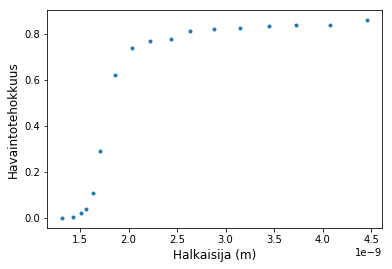

In [17]:
plot2()

In [18]:
# ladataan interpolointia varten sopivat kirjastot
from scipy.interpolate import interp1d,splrep,splev

# interpoloi havaintotehokkuusdata hiukkaskokojakaumaan sopivalle x-akselille
# huom lineaarinen interpolaatio antaa NaN arvoja x-arvoilla joille ei ole dataa
# spline taas antaa y arvoja koko x alueelle, mutta datan ulkopuolella niihin ei kannata uskoa
det_int_linear=interp1d(dp,det,bounds_error=False)
det_int_spline=splrep(dp,det)

linearInterpolation = det_int_linear(dp_sd)
splineInterpolation = splev(dp_sd,det_int_spline)

In [22]:
# ladataan sublplottausta varten muutama paketti
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [23]:
def plot3():
    # opetellaan samalla hieman subplottausta

    # tehdään uusi kuva default subblotilla 111
    fig, ax = plt.subplots(figsize=[8,5])

    # valitaan esitettävä data kuvaajaan
    ax.plot(dp, det, 'o',label='Data')
    ax.plot(dp_sd,linearInterpolation,'-',label='Lineaarinen interpolointi')
    ax.plot(dp_sd,splineInterpolation,'-',label='Spline interpolointi')

    # rajataan kuvan akselit
    plt.axis([1e-9,6e-9,0,2])

    # nimetään akselit ja asetetaan selite
    plt.xlabel("Halkaisija (m)", fontsize = 12)
    plt.ylabel("Havaintotehokkuus", fontsize = 12)
    plt.legend(loc='upper right', shadow=True, fontsize = 12)

    # tehdään kuvaajan sisään pienempi kuvaaja
    #  2.75 kertainen suurennos x-akselille ja 1.75 y-akselille
    axins = inset_axes(ax, 2.75,1.75 , loc=2)

    # valitaan siin esitettävä data
    axins.plot(dp, det, 'o')
    axins.plot(dp_sd,det_int_linear(dp_sd),'-')
    axins.plot(dp_sd,splev(dp_sd,det_int_spline),'-')

    # rajataan pikkukuvan akselit
    x1, x2, y1, y2 = 1.7e-9, 2.1e-9, 0.25, 0.8
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    # asetetaan akselien skaala pois häiritsemästä
    plt.xticks(visible=False)
    plt.yticks(visible=False)

    # liitetään pikkukuva ja alkuperäinen yhteen graafisesti
    # eli esitetään alkuperäisessä kuvaajassa alue, josta
    # pikkukuva on esitetty ja yhdistetään nämä viivoilla
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

    plt.show()

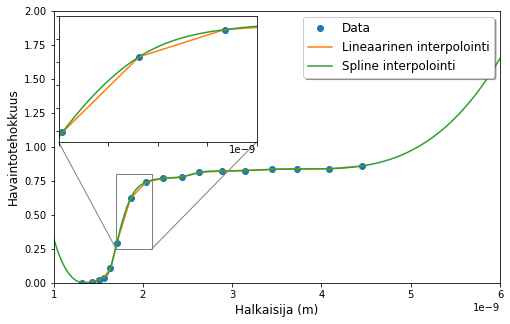

In [24]:
plot3()

####  Datan interpolaatio teorian avulla
- Sovitetaan teorian $f(x) = c \cdot\exp(-e^{-a(x-b)})$ mukainen funktio.
- Voidaan sekä interpoloida ja extrapoloida

In [80]:
# ladataan jälleen lisää tarvittavia paketteja
from scipy.optimize import curve_fit

# ja määritetään funktio, joka on teorian arvauksen mukainen
def fit_func (x,a,b,c):
    return c*np.exp(-np.exp(-a*(x-b)))

# fittaus toimii huonosti kun yksikkönä on metrit, 
# koska arvot niin pieniä, että tulee herkästi overflow,
# muutetaan siksi nanometreiksi jolloin fittaus toimii ongelmitta.

popt, pcov = curve_fit(fit_func, dp*1e9, det)
a,b,c=popt

# Nyt saadaan järkeviä arvoja myös datan ulkopuolelle,
# jos ja kun funktiomuoto tiedetään ennalta

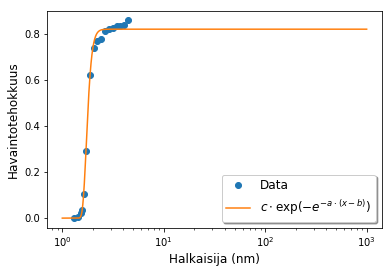

In [81]:
plt.semilogx(dp*1e9,det,'o',label="Data")
plt.semilogx(dp_sd*1e9,fit_func(dp_sd*1e9,a,b,c),label=r"$c \cdot \exp \left(-e^{-a \cdot (x-b)}\right)$")
plt.xlabel("Halkaisija (nm)", fontsize = 12)
plt.ylabel("Havaintotehokkuus", fontsize = 12)
plt.legend(loc='best', shadow=True, fontsize = 12)
plt.show()

- Nyt havaintotehokkuuskäyrä on interpoloitu uudelle x-akselille, harjoitustehtäväksi jää tutkailla havaittujen hiukkasten määrää